![](https://www.nasa.gov/sites/default/files/thumbnails/image/nasa-logo-web-rgb.png)

# Planetary Mystery

Welcome to your first day as a data intern for NASA! As a fun exercise, all interns will be working to solve... a planetary mystery!

The dataset you will be working on contains weather data for a planet in our solar system, but the identity of that planet is unknown. Your task is to use your data analytics chops to identify the mystery planet!

As usual, you will begin by exploring your dataset.

The dataset, provided by NASA, is called `planet_weather.csv`, and it contains the following information:

- **terrestrial_date**: Date on planet Earth, captured as `yyyy-mm-dd`.

- **sol**: number of elapsed planetary days since beginning measurement.

- **ls**: solar longitude. 0: fall equinox. 90: winter solstice. 180: spring equinox. 270: summer solstice.

- **month**: the month number on the mystery planet.

- **min_temp**: the minimum temperature, in Celsius, during a single day.

- **pressure**: atmospheric pressure, in Pascals.

- **wind_speed**: average wind speed, in meters per second.

- **atmo_opacity**: atmospheric opacity.



# Task 1: Data Inspection

![](https://media.giphy.com/media/pz7LNMYN2dj0hgKaHj/giphy.gif)

In [110]:
# import pandas and plotly express libraries
import pandas as pd
import plotly.express as px

In [111]:
# load planet_weather.csv data from datasets folder
df = pd.read_csv('datasets/planet_weather.csv')

In [112]:
# preview the data
df.head()

,id,terrestrial_date,sol,ls,month,min_temp,max_temp,pressure,wind_speed,atmo_opacity
0,1895,2018-02-27,1977,135,Month 5,-77.0,-10.0,727.0,NaN,Sunny
1,1893,2018-02-26,1976,135,Month 5,-77.0,-10.0,728.0,NaN,Sunny
2,1894,2018-02-25,1975,134,Month 5,-76.0,-16.0,729.0,NaN,Sunny
3,1892,2018-02-24,1974,134,Month 5,-77.0,-13.0,729.0,NaN,Sunny
4,1889,2018-02-23,1973,133,Month 5,-78.0,-18.0,730.0,NaN,Sunny


In [113]:
# How many rows and columns are there in the dataset?
df.shape

(1894, 10)

In [114]:
# what are the names of all the columns?
df.columns

Index(['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'max_temp',
       'pressure', 'wind_speed', 'atmo_opacity'],
      dtype='object')

In [115]:
# What is the data type of each column?
df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                object
min_temp            float64
max_temp            float64
pressure            float64
wind_speed          float64
atmo_opacity         object
dtype: object

In [116]:
# How many null values are there in each column?
df.isnull().sum()

id                     0
terrestrial_date       0
sol                    0
ls                     0
month                  0
min_temp              27
max_temp              27
pressure              27
wind_speed          1894
atmo_opacity           0
dtype: int64

In [117]:
# Provide a statistical summary of the DataFrame
df.describe()

,id,sol,ls,min_temp,max_temp,pressure,wind_speed
count,1894.000000,1894.000000,1894.000000,1867.000000,1867.000000,1867.000000,0.0
mean,948.372228,1007.930306,169.180570,-76.121050,-12.510445,841.066417,NaN
std,547.088173,567.879561,105.738532,5.504098,10.699454,54.253226,NaN
min,1.000000,1.000000,0.000000,-90.000000,-35.000000,727.000000,NaN
25%,475.250000,532.250000,78.000000,-80.000000,-23.000000,800.000000,NaN
50%,948.500000,1016.500000,160.000000,-76.000000,-11.000000,853.000000,NaN
75%,1421.750000,1501.750000,259.000000,-72.000000,-3.000000,883.000000,NaN
max,1895.000000,1977.000000,359.000000,-62.000000,11.000000,925.000000,NaN


# Task 2: Data Cleaning

![](https://media.giphy.com/media/l49JEBkw8tD64fbeE/giphy-downsized-large.gif)

In [118]:
# Looks like the wind speed sensor on the Rover was broken
# Delete wind_speed column, which is filled with null values
df1 = df.drop(columns=['wind_speed'])
df1

,id,terrestrial_date,sol,ls,month,min_temp,max_temp,pressure,atmo_opacity
0,1895,2018-02-27,1977,135,Month 5,-77.0,-10.0,727.0,Sunny
1,1893,2018-02-26,1976,135,Month 5,-77.0,-10.0,728.0,Sunny
2,1894,2018-02-25,1975,134,Month 5,-76.0,-16.0,729.0,Sunny
3,1892,2018-02-24,1974,134,Month 5,-77.0,-13.0,729.0,Sunny
4,1889,2018-02-23,1973,133,Month 5,-78.0,-18.0,730.0,Sunny
...,...,...,...,...,...,...,...,...,...
1889,24,2012-08-18,12,156,Month 6,-76.0,-18.0,741.0,Sunny
1890,13,2012-08-17,11,156,Month 6,-76.0,-11.0,740.0,Sunny
1891,2,2012-08-16,10,155,Month 6,-75.0,-16.0,739.0,Sunny
1892,232,2012-08-15,9,155,Month 6,NaN,NaN,NaN,Sunny


In [119]:
# How many unique values are there in the atmo_opacity column?
# hint: both .unique() and .value_counts() will work here
df1['atmo_opacity'].value_counts()

Sunny    1891
--          3
Name: atmo_opacity, dtype: int64

In [120]:
# The atmosphere sensors were faulty and did not capture accurate data
# Delete atmo_opacity column, which mostly contains identical values
df2 = df1.drop(columns=['atmo_opacity'])
df2

,id,terrestrial_date,sol,ls,month,min_temp,max_temp,pressure
0,1895,2018-02-27,1977,135,Month 5,-77.0,-10.0,727.0
1,1893,2018-02-26,1976,135,Month 5,-77.0,-10.0,728.0
2,1894,2018-02-25,1975,134,Month 5,-76.0,-16.0,729.0
3,1892,2018-02-24,1974,134,Month 5,-77.0,-13.0,729.0
4,1889,2018-02-23,1973,133,Month 5,-78.0,-18.0,730.0
...,...,...,...,...,...,...,...,...
1889,24,2012-08-18,12,156,Month 6,-76.0,-18.0,741.0
1890,13,2012-08-17,11,156,Month 6,-76.0,-11.0,740.0
1891,2,2012-08-16,10,155,Month 6,-75.0,-16.0,739.0
1892,232,2012-08-15,9,155,Month 6,NaN,NaN,NaN


# Task 3: Data Analysis & Visualization

![](https://media.giphy.com/media/1n8aGJBEXuW0M7ELrB/giphy.gif)



In [121]:
# How many months are there on this planet?
df2['month'].nunique()

12

In [122]:
# What is the average min_temp for each month?
avg_temp = df2.groupby('month').agg({'min_temp':'mean'})
avg_temp

,min_temp
month,
Month 1,-77.160920
Month 10,-71.982143
Month 11,-71.985507
Month 12,-74.451807
Month 2,-79.932584
Month 3,-83.307292
Month 4,-82.747423
Month 5,-79.308725
Month 6,-75.299320


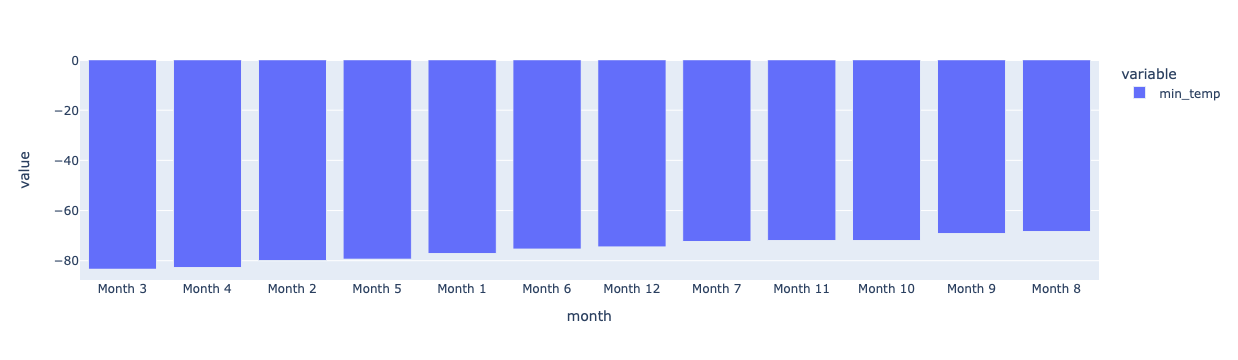

In [123]:
# Plot a bar chart of the average min_temp by mont
sorted_avg_temp = avg_temp.sort_values(by= 'min_temp', ascending=True)
px.bar(sorted_avg_temp)


Based on the minimum temperature, what is the coldest month? The warmest month?

*The coldest month is Month 3 and the warmest is Month 8.*

In [124]:
# What is the average pressure for each month?
avg_press = df2.groupby('month').agg({'pressure':'mean'})
avg_press

,pressure
month,
Month 1,862.488506
Month 10,887.312500
Month 11,857.014493
Month 12,842.156627
Month 2,889.455056
Month 3,877.322917
Month 4,806.329897
Month 5,748.557047
Month 6,745.054422


In [125]:
# Create a bar chart of the average atmospheric pressure by month
sorted_avg_press = avg_press.sort_values(by= 'pressure', ascending=True)
px.bar(sorted_avg_press)

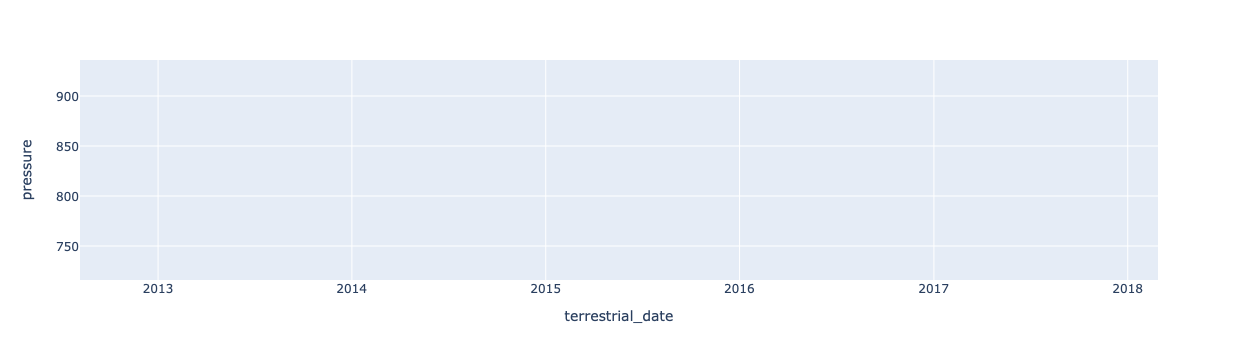

In [93]:
# Plot a line chart of the daily atmospheric pressure by terrestrial date
# note: you do not need to modify the dataframe
# use the original one you loaded at the beginning of the milestone.
px.line(df, y='pressure',x='terrestrial_date' )

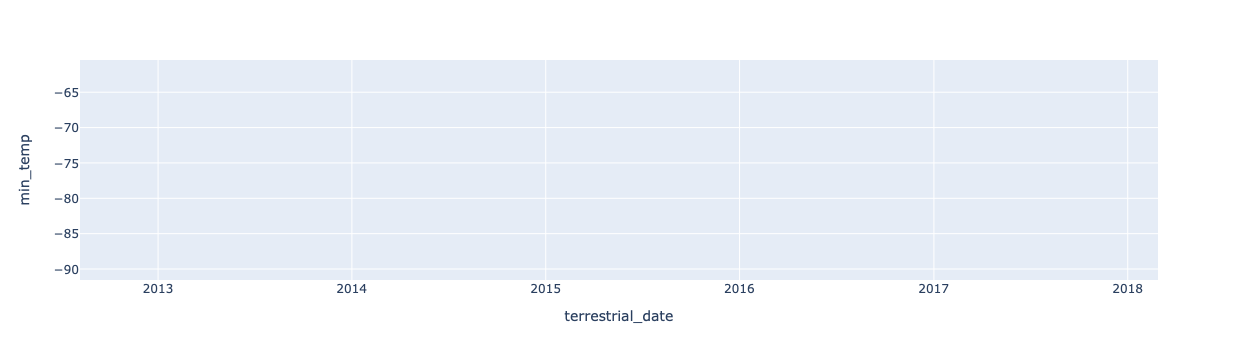

In [94]:
# Plot a line chart the daily minimum temp
# note: you do not need to modify the dataframe
# use the original one you loaded at the beginning of the milestone.
px.line(df, x='terrestrial_date', y='min_temp')

### Based on this information, approximately how many earth days are there in a year on this planet?

<span style='background :#FFF59E'>**Note**: To get an approximate range for how long a "year" is on this planet, look at the plots of the atmospheric pressure and the temperatures by day. Use the visualizations to get a *rough estimate* between matching "peaks".</span>

*After observing both line charts, I see that the matching peaks for each graph is almost every 2 years, so there are a little less than 730 days in a year on this planet.*


### What is the identity of the planet?

Go to [this website](https://spaceplace.nasa.gov/years-on-other-planets/en/) and see what planet this lines up with!

*This planet would be Mars.*

## Congratulations on making your first extra-terrestrial discovery!

![](https://media.giphy.com/media/5ndfKr0Nv92LkWrKpU/giphy.gif)

# Level Up

![](https://media.giphy.com/media/kjjRGpezebjaw/giphy.gif)

Earlier in the milestone you investigated how many months were in our Mystery Planet. Unfortunately, the answer (12) was not very satisfying. This is because there is no standard calendar for Mars. When the data was collected, they used 12 "months" though each month is longer than a typical Earth month. Let's investigate!

First, filter your dataset so that you are only looking at any `terrestrial_date` before 2014.

<span style='background :#FFF59E'>**Note**: Since the `terrestrial_date` is a `string` data type, this is simply checking for all values that satisfy the condition `< '2014'` (<-- don't forget the quotes!) </span>

In [99]:
# filter to all values where terrestrial_date is before 2014
# store it in a new variable.
bef_14 = df2[df2['terrestrial_date']<'2014']
bef_14

,id,terrestrial_date,sol,ls,month,min_temp,max_temp,pressure
1453,432,2013-12-31,499,69,Month 3,-84.0,-30.0,899.0
1454,424,2013-12-30,498,69,Month 3,-86.0,-28.0,901.0
1455,425,2013-12-29,497,69,Month 3,-86.0,-30.0,901.0
1456,428,2013-12-28,496,68,Month 3,-85.0,-26.0,901.0
1457,431,2013-12-27,495,68,Month 3,-86.0,-26.0,900.0
...,...,...,...,...,...,...,...,...
1889,24,2012-08-18,12,156,Month 6,-76.0,-18.0,741.0
1890,13,2012-08-17,11,156,Month 6,-76.0,-11.0,740.0
1891,2,2012-08-16,10,155,Month 6,-75.0,-16.0,739.0
1892,232,2012-08-15,9,155,Month 6,NaN,NaN,NaN


<span style='background :#DDD5F3'>If done correctly, you will have a dataframe with `441` rows.</span>

Lastly, for each month in the dataframe, return both the `min` value and the `max` value of the `terrestrial_date` field.

<span style='background :#FFF59E'>**Hint 1**: Use `.groupby()`</span>

<span style='background :#FFF59E'>**Hint 2**: In the dictionary for your `.agg()` function, pass a `list` of values. e.g. `{col_to_check: [func1, func2]}`. Remember to use the appropriate values / variables from the dataframe and the desired functions.</span>

In [104]:
# For each month, calculate the min & max value of the terrestrial_date field.
min_max = bef_14.groupby('month').agg({'terrestrial_date':['min','max']})
min_max

terrestrial_date            
                      min         max
month                                
Month 1        2013-08-01  2013-10-02
Month 10       2013-02-24  2013-04-12
Month 11       2013-04-13  2013-06-04
Month 12       2013-06-05  2013-07-31
Month 2        2013-10-03  2013-12-08
Month 3        2013-12-09  2013-12-31
Month 6        2012-08-07  2012-09-29
Month 7        2012-09-30  2012-11-19
Month 8        2012-11-20  2013-01-07
Month 9        2013-01-08  2013-02-23

How many Earth days, roughly, are there in each "month" in the mystery planet? Does that lineup with what you expected now that you know the identity of the mystery planet?

*There are roughly 60 days in each "month". Yes, this lines up with what I expected.*